<a href="https://colab.research.google.com/github/abhishek2720/FarmBot/blob/main/Farmbot_Weed_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image

In [3]:
img_width, img_height = 512, 512

train_data_dir = '/content/drive/MyDrive/Common/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Common/Data/Validation'
nb_train_samples = 5975
nb_validation_samples = 1800
epochs = 10
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


train_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5975 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [4]:
from keras.models import load_model


In [5]:
new_model = load_model('/content/drive/MyDrive/Common/models/VGG16/vgg16_model (1).h5')

In [6]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [7]:
new_model.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [8]:

new_model.optimizer

In [9]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline


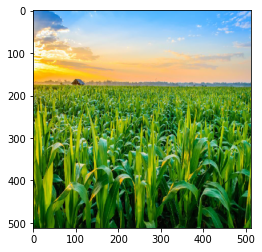

In [11]:
img_pred = image.load_img('/content/crops.jpg',target_size=(512,512))
imgplot = plt.imshow(img_pred)
plt.show()
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred , axis = 0)

In [12]:

result = new_model.predict(img_pred)
print(result)

if result[0][0] ==1:
    prediction = "weed"
    
else:
    prediction = "crop"
    
print(prediction)

[[0.]]
crop
